In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
img_1.shape, img_2.shape

((225, 225, 3), (640, 960, 3))

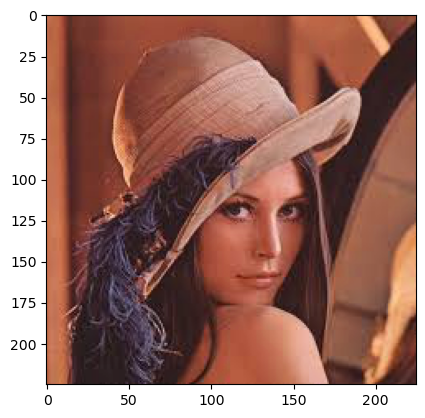

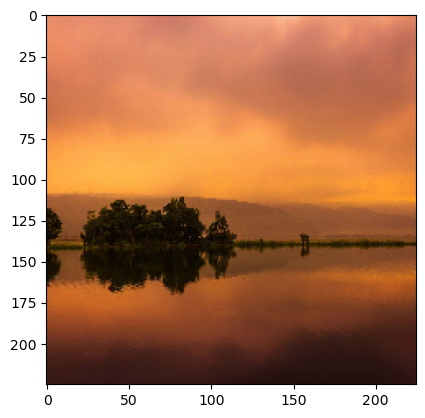

In [16]:
img_1 = cv2.imread('./data/images/lena.jpg')
img_2 = cv2.imread('./data/images/nature_brown.jpg')
img_2 = cv2.resize(img_2, (225,225))

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_HSV2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_HSV2RGB))
plt.show()

In [17]:
hist_1 = cv2.calcHist([img_1], [0,1], None, [180, 256], [0,180, 0,256])
cv2.normalize(hist_1, hist_1, 0, 1, norm_type=cv2.NORM_MINMAX)

hist_2 = cv2.calcHist([img_2], [0,1], None, [180, 256], [0,180, 0,256])
cv2.normalize(hist_2, hist_2, 0, 1, norm_type=cv2.NORM_MINMAX);

In [18]:
compare_1 = cv2.compareHist(hist_1, hist_2, method=cv2.HISTCMP_CORREL)  ## 1에 가까울수록 유사 (1: 완전 일치, -1: 완전 불일치, 0: 무관계)
compare_2 = cv2.compareHist(hist_1, hist_2, method=cv2.HISTCMP_CHISQR)  ## 0에 가까울수록 유사 (0: 완전 일치, 무한대: 완전 불일치)
compare_3 = cv2.compareHist(hist_1, hist_2, method=cv2.HISTCMP_INTERSECT)  ## 값이 클수록 유사 (1: 완전 일치, 0: 완전 불일치 - 1로 정규화한 경우)
compare_4 = cv2.compareHist(hist_1, hist_2, method=cv2.HISTCMP_BHATTACHARYYA)  ## 값이 작을수록 유사

In [19]:
compare_1, compare_2, compare_3, compare_4

(0.37646164326708315,
 1214.4668408188943,
 43.427794005023316,
 0.7654414927286151)